## RM ANOVA in R using afex

### How to Install afex

In [1]:
list.of.packages <- c("afex", "emmeans")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

In [2]:
require(afex)


df <- read.csv(file='./Python_ANOVA/rmAOV2way.csv', header=TRUE, sep=',')

head(df)

Loading required package: afex
Loading required package: lme4
Loading required package: Matrix
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
************
Welcome to afex. For support visit: http://afex.singmann.science/
- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'KR', 'S', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: library('emmeans') now needs to be called explicitly!
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("

Sub_id,rt,iv1,iv2
1,1082.9866,noise,down
2,938.7997,noise,down
3,1101.4710,noise,down
4,1123.0303,noise,down
5,938.0516,noise,down
6,864.4438,noise,down


### One-Way ANOVA

In [3]:
aov <- aov_ez('Sub_id', 'rt', 
              fun_aggregate = mean, df, within = 'iv1')
print(aov)

Anova Table (Type 3 tests)

Response: rt
  Effect    df     MSE           F ges p.value
1    iv1 1, 59 3652.85 2207.02 *** .95  <.0001
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1


### Two-Way ANOVA

In [4]:
aov <- aov_ez('Sub_id', 'rt', fun_aggregate = mean, 
              df, within = c('iv1', 'iv2'))
print(aov)

Anova Table (Type 3 tests)

Response: rt
   Effect           df      MSE           F ges p.value
1     iv1        1, 59 10958.55 2207.02 *** .87  <.0001
2     iv2 1.98, 116.79  8871.20  275.41 *** .58  <.0001
3 iv1:iv2 1.97, 116.37 10668.36        1.87 .01     .16
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1

Sphericity correction method: GG 


### Interaction Plot

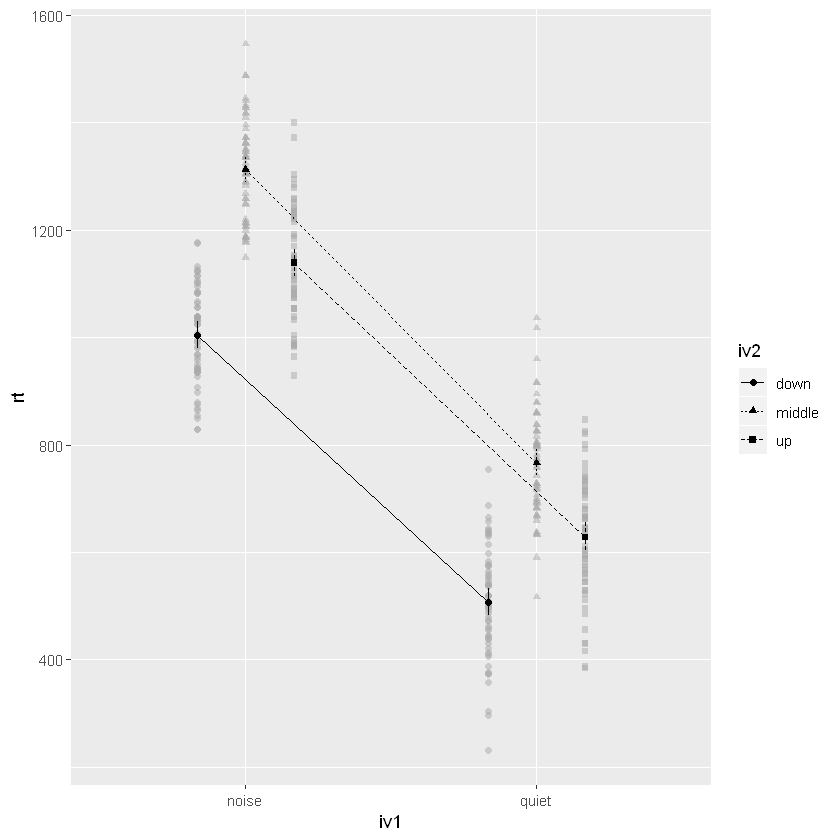

In [5]:
afex_plot(aov, x = "iv1", trace = "iv2",
         error = "within")